# Coronavirus tweets from `Twitter API`
This notebook pulls data from the Twitter API for processing and subsequent analysis

### Summary 
The goal of this notebook is to analyze the sentiment, as it relates to the coronavirus/covid-19 pandemic, and as expressed on Twitter by people in particular cities. Twitter API can access tweet locations when coordinates are provided. The coordinates are provided for the 2 nigerian cites of interest: **Lagos** and **Kano**. These cities are chosen because of contrasting dynamics: Lagos is more highly dense, more urban, more culturally diverse and is expected to have much higher social media activity; while Kano is a lot more rural and the use of local languages is more prevalent 
### Objective
The ultimate goal is to be able to infer from tweets, the overall sentiment of people in a city: are they happy, sad, satisfied, frustrated with the pandemic situation? Another key question: are ordinary people tweeting about suspicious deaths as covid-related? However, limitations exist on training sets (labelled corpus) on which a sentiment classifier, for example, may be trained.

At this time, the data is obtained from Twitter API, it is filtered and compiled on a day-to-day basis, tokenized, cleaned, visualized and stored in dictionary data structures for future further processing
### Method
The processes within this Notebook is presented as:
- Twitter API token credentials is set up
- Control structures are used within the API request to access daily tweets efficiently and within the API limit: 180 Requests / 15-min window
- Tweets are filtered on a daily basis, Regex matching is used on API data for this filtering
- API data is also filtered for retweets and capitalization to avoid duplictes within the final data structure
- Package nltk is used to tokenize the filtered tweets
- Pacakge nltk's "stopwords" is used in addition with punctuations to filter tokenized words
- Package wordcloud is used for visualization

**nb:** The API request structure is designed to draw up to 10,000 tweets from each city daily, however, if less than 10,000 corona/covid tweets are available, an error is generated. This is normal (future work: adding an error exception code) 

In [1]:
today_date= input('Enter today\'s date in format ddd mmm dd e.g. Mon May 25:  ')                       

Enter today's date in format ddd mmm dd e.g. Mon May 25:  Mon Jun 01


In [2]:
yesterday_date= input('Enter yesterday\'s date in format ddd mmm dd e.g. Sun May 24:  ')

Enter yesterday's date in format ddd mmm dd e.g. Sun May 24:  Sun May 31


In [3]:
tomorrow_date= input('Enter tomorrow\'s date in format date: YYYY-MM-DD e.g. 2020-05-26:  ')

Enter tomorrow's date in format date: YYYY-MM-DD e.g. 2020-05-26:  2020-06-02


In [4]:
import re
import pickle
import os
import json

In [5]:
import nltk
import string

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
#nltk.download('punkt')
#nltk.download('stopwords')

In [8]:
if not os.path.exists('secret_twitter_credentials.pkl'):
    Twitter={}
    Twitter['Consumer Key'] = ''
    Twitter['Consumer Secret'] = ''
    Twitter['Access Token'] = ''
    Twitter['Access Token Secret'] = ''
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))


In [9]:
#!pip install twitter

In [10]:
import twitter

auth = twitter.oauth.OAuth(Twitter['Access Token'],
                           Twitter['Access Token Secret'],
                           Twitter['Consumer Key'],
                           Twitter['Consumer Secret'])

twitter_api = twitter.Twitter(auth=auth)
twitter_api

In [11]:
Kano_WOEID = 1396803
Nigeria_WOEID = 23424908
Calgary_WOEID = 8775
Canada_WOEID = 23424775
USA_WOEID = 23424977
World_WOEID = 1

In [12]:
Kano_Coordinates = '12.002200,8.592000,80km'
Lagos_Coordinates = '6.524400,3.379200,30km'

### Trends

In [13]:
Nigeria_Trends = twitter_api.trends.place(_id=World_WOEID)
Kano_Trends = twitter_api.trends.place(_id=Kano_WOEID)

### "Corona/Covid" tweets in given twitter locations  

In [14]:
Kano_dict = {}
Lagos_dict = {}
all_text_Kano = []
all_text_Lagos = []

In [15]:
#initialize IDs from previous day Kano dictionary
yest_date_Kano = yesterday_date.replace(' ','_') +'_2020' + '_Kano' + '.txt'
yest_dict_Kano = open(yest_date_Kano, mode='r', encoding='utf-8')
literal_Kano = eval(yest_dict_Kano.read())
min_ID_Kano = min(literal_Kano)
max_ID_Kano = max(literal_Kano)
yest_dict_Kano.close()

In [16]:
#initialize IDs from previous day Lagos dictionary
yest_date_Lagos = yesterday_date.replace(' ','_') +'_2020' + '_Lagos' + '.txt'
yest_dict_Lagos = open(yest_date_Lagos, 'r', encoding='utf-8')
literal_Lagos = eval(yest_dict_Lagos.read())
min_ID_Lagos = min(literal_Lagos)
max_ID_Lagos = max(literal_Lagos)
yest_dict_Lagos.close()

In [17]:
while len(Kano_dict) < 10000:
    
    check_min_Kano = min_ID_Kano
    check_max_Kano = max_ID_Kano
        
    Kano_Search = twitter_api.search.tweets(q='corona OR covid', geocode=Kano_Coordinates, tweet_mode='extended', count=100,\
                                            since_id= max_ID_Kano, until=tomorrow_date)
    for j in Kano_Search['statuses']:
        if re.findall('\w{3,4}\s\w{3,4}\s\w{2}',j['created_at']) == [today_date]:
            if j['full_text'].lower() not in all_text_Kano:
            
                Kano_dict[j['id']] = {'text': j['full_text'].lower(), 'created_at':j['created_at'],\
                                      'screen_name':j['user']['screen_name']}
    
                all_text_Kano.append(j['full_text'].lower())
        
    min_ID_Kano = min([i for i in Kano_dict])
    max_ID_Kano = max([i for i in Kano_dict])
    
    if check_min_Kano == min_ID_Kano and check_max_Kano == max_ID_Kano:
        
        Kano_Search = twitter_api.search.tweets(q='corona OR covid', geocode=Kano_Coordinates, tweet_mode='extended', count=100,\
                                                   max_id= min_ID_Kano, until=tomorrow_date)
        for j in Kano_Search['statuses']:
            if re.findall('\w{3,4}\s\w{3,4}\s\w{2}',j['created_at']) == [today_date]:
                if j['full_text'].lower() not in all_text_Kano:
            
                    Kano_dict[j['id']] = {'text': j['full_text'].lower(), 'created_at':j['created_at'],\
                                                      'screen_name':j['user']['screen_name']}
    
                    all_text_Kano.append(j['full_text'].lower())
        
        min_ID_Kano = min([i for i in Kano_dict])
        max_ID_Kano = max([i for i in Kano_dict])

TwitterHTTPError: Twitter sent status 503 for URL: 1.1/search/tweets.json using parameters: (count=100&geocode=12.002200%2C8.592000%2C80km&max_id=1267245342921195527&oauth_consumer_key=37bcrODG7tssv44kzoa7cPVvX&oauth_nonce=1573139302873597791&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1591131319&oauth_token=234199129-IhZhe8RyoaQmvBCOW5rLfnPbVI8l8Nuon8Q0NjQ2&oauth_version=1.0&q=corona%20OR%20covid&tweet_mode=extended&until=2020-06-02&oauth_signature=u7Q5rXYTN5QTqlpLm%2BbAPVsxcVU%3D)
details: {}

In [18]:
print(len(Kano_dict))
print(Kano_dict[max_ID_Kano]['created_at'])
print(Kano_dict[min_ID_Kano]['created_at'])

204
Mon Jun 01 23:56:07 +0000 2020
Mon Jun 01 00:03:28 +0000 2020


In [19]:
while len(Lagos_dict) < 10000:
    
    check_min_Lagos = min_ID_Lagos
    check_max_Lagos = max_ID_Lagos
    
    Lagos_Search = twitter_api.search.tweets(q='corona OR covid', geocode=Lagos_Coordinates, tweet_mode='extended', count=100,\
                                             since_id= max_ID_Lagos, until=tomorrow_date)
    for j in Lagos_Search['statuses']:
        if re.findall('\w{3,4}\s\w{3,4}\s\w{2}',j['created_at']) == [today_date]:
            if j['full_text'].lower() not in all_text_Lagos:

                Lagos_dict[j['id']] = {'text': j['full_text'].lower(), 'created_at':j['created_at'],\
                                       'screen_name':j['user']['screen_name']}
        
                all_text_Lagos.append(j['full_text'].lower())
        
    min_ID_Lagos = min([i for i in Lagos_dict])
    max_ID_Lagos = max([i for i in Lagos_dict])
    
    if check_min_Lagos == min_ID_Lagos and check_max_Lagos == max_ID_Lagos:
        
        Lagos_Search = twitter_api.search.tweets(q='corona OR covid', geocode=Lagos_Coordinates, tweet_mode='extended', count=100,\
                                                 max_id= min_ID_Lagos, until=tomorrow_date)
        for j in Lagos_Search['statuses']:
            if re.findall('\w{3,4}\s\w{3,4}\s\w{2}',j['created_at']) == [today_date]:
                if j['full_text'].lower() not in all_text_Lagos:

                    Lagos_dict[j['id']] = {'text': j['full_text'].lower(), 'created_at':j['created_at'],\
                                       'screen_name':j['user']['screen_name']}
        
                    all_text_Lagos.append(j['full_text'].lower())
        
        min_ID_Lagos = min([i for i in Lagos_dict])
        max_ID_Lagos = max([i for i in Lagos_dict])

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&geocode=6.524400%2C3.379200%2C30km&max_id=1267296908839616514&oauth_consumer_key=37bcrODG7tssv44kzoa7cPVvX&oauth_nonce=13358185485576640559&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1591132221&oauth_token=234199129-IhZhe8RyoaQmvBCOW5rLfnPbVI8l8Nuon8Q0NjQ2&oauth_version=1.0&q=corona%20OR%20covid&tweet_mode=extended&until=2020-06-02&oauth_signature=ZvdUdjvmzSSXTyNrrUHi80P%2Bn%2FA%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

In [21]:
print(len(Lagos_dict))
print(Lagos_dict[max_ID_Lagos]['created_at'])
print(Lagos_dict[min_ID_Lagos]['created_at'])

2964
Mon Jun 01 23:59:53 +0000 2020
Mon Jun 01 03:28:22 +0000 2020


In [22]:
print('max_ID_Kano:',max_ID_Kano,'\n','min_ID_Kano:',min_ID_Kano,'\n','max_ID_Lagos:',max_ID_Lagos,'\n','min_ID_Lagos:',min_ID_Lagos)

max_ID_Kano: 1267605880918413312 
 min_ID_Kano: 1267245342921195527 
 max_ID_Lagos: 1267606830064246784 
 min_ID_Lagos: 1267296908839616514


In [23]:
#Today's kano dictionary to csv
name_Kano = today_date.replace(' ','_') +'_2020' + '_Kano' + '.txt'
f_Kano = open(name_Kano, 'w', encoding='utf-8')
f_Kano.write(str(Kano_dict))
f_Kano.close()

In [24]:
#Today's Lagos dictionary to csv
name_Lagos = today_date.replace(' ','_') +'_2020' + '_Lagos' + '.txt'
f_Lagos = open(name_Lagos, 'w', encoding='utf-8')
f_Lagos.write(str(Lagos_dict))
f_Lagos.close()

### Clean out common words, stopwords and punctuation

In [25]:
useless_words= nltk.corpus.stopwords.words('english') + list(string.punctuation) +['rt','https','co','CO','Co','http']

In [26]:
Kano_unclean = []
Lagos_unclean = []

In [27]:
for i in all_text_Kano:
    dummy_Kano = nltk.word_tokenize(i)
    Kano_unclean.extend(dummy_Kano)

In [28]:
for i in all_text_Lagos:
    dummy_Lagos = nltk.word_tokenize(i)
    Lagos_unclean.extend(dummy_Lagos)

In [29]:
Kano_clean = [i for i in Kano_unclean if i not in useless_words]

In [30]:
Lagos_clean = [i for i in Lagos_unclean if i not in useless_words]

### Word Cloud Visualisation

In [31]:
#!pip install wordcloud

In [32]:
wordcloud_Kano = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate([' '.join(i for i in Kano_clean)][0])

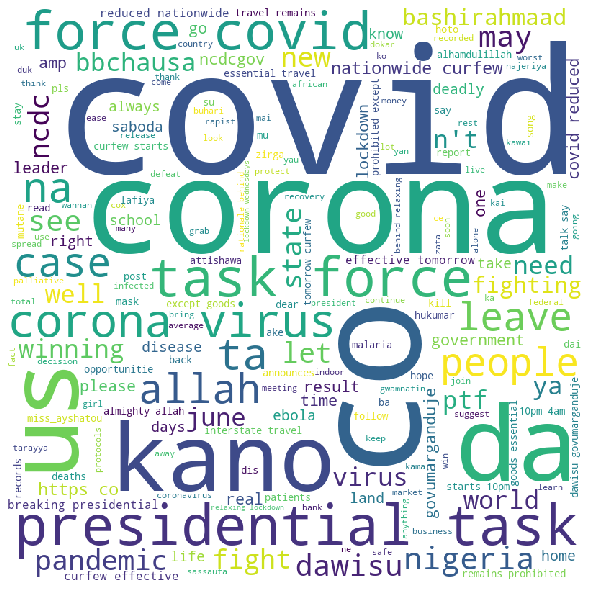

In [33]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_Kano) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [34]:
wordcloud_Lagos = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate([' '.join(i for i in Lagos_clean)][0])

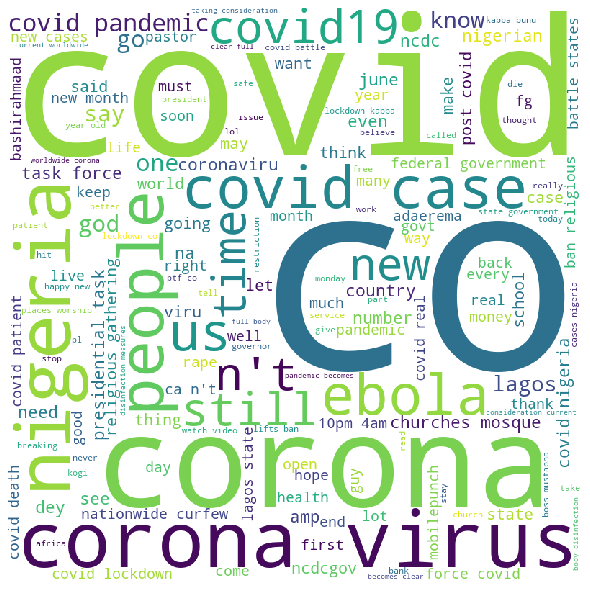

In [35]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_Lagos) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 